## Import data


In [ ]:
 from google.colab import drive, files
import pandas as pd
drive.mount('/content/drive')
train_path = "/content/drive/MyDrive/kaggle/Optiver_trading_at_close/train.csv"
data = pd.read_csv(train_path)

MessageError: ignored

In [ ]:
26455*200

5291000

In [ ]:
for i in range(200):
  if data[data.stock_id == i].shape[0] != 26455:
    print(f'For the stock {i} there is {data[data.stock_id == i].shape[0]}')

NameError: ignored

In [ ]:
import numpy as np

In [ ]:
stock_id_mean_diff_bid_ask = {}
for i in range(200):
  filtered_data = data[(data['stock_id'] == i)]#& (data['seconds_in_bucket'] == 540)]
  stock_id_mean_diff_bid_ask[i] = filtered_data.bid_price.mean() #np.array(filtered_data.ask_price - filtered_data.bid_price).mean()

In [ ]:
sorted_bid_ask = sorted(stock_id_mean_diff_bid_ask.items(), key=lambda x:x[1])
print(sorted_bid_ask)

[(143, 0.9986271496881497), (82, 0.9988064825174825), (101, 0.9989755741666667), (31, 0.9990503136647138), (85, 0.9991769234549235), (153, 0.9991984662685247), (69, 0.9992319973382473), (177, 0.9993730653562652), (100, 0.9993742042714043), (98, 0.9994561366093366), (118, 0.9994599747873748), (117, 0.9994694243432244), (1, 0.9994801614817616), (134, 0.9994828420336419), (114, 0.9994947535437534), (62, 0.9995116354186353), (8, 0.9995159512757512), (158, 0.9995219511363636), (108, 0.9995231223209223), (97, 0.9995324421848423), (78, 0.9995435775490757), (6, 0.9995485912303912), (64, 0.9995602164052164), (46, 0.9995653720279719), (80, 0.9995685573237575), (119, 0.9995775157815158), (172, 0.9995781092043093), (138, 0.99958572988093), (107, 0.9995872976374977), (152, 0.9995890982044983), (135, 0.9995892097805642), (71, 0.9995944042336042), (25, 0.9995983233037234), (110, 0.9996011825363825), (19, 0.9996019631439395), (16, 0.9996028988092988), (34, 0.9996061408051408), (136, 0.9996071304101306

In [ ]:
import matplotlib.pyplot as plt


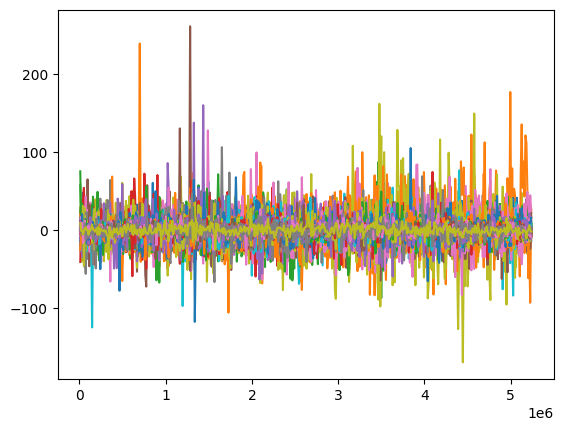

In [ ]:
for i in range(200):
  if data[data.stock_id == i].shape[0] == 26455:
    filtered_data = data[(data['stock_id'] == i) & (data['seconds_in_bucket'] == 540)]
    plt.plot(filtered_data.target)

## Exploratory Data analysis:


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB


In [ ]:
def reduce_memory_usage(df):
    """
    Reduce memory usage by downcasting data types
    within a pandas DataFrame.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print(f'Memory usage of dataframe is {start_mem:.2f} MB')

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print(f'Memory usage after optimization is: {end_mem:.2f} MB')
    print(f'Decreased by {100 * (start_mem - end_mem) / start_mem:.1f}%')

    return df


In [ ]:
data = reduce_memory_usage(data)

Memory usage of dataframe is 679.36 MB
Memory usage after optimization is: 383.76 MB
Decreased by 43.5%


### Nan values

In [ ]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

stock_id                    0.000000
date_id                     0.000000
seconds_in_bucket           0.000000
imbalance_size              0.004200
imbalance_buy_sell_flag     0.000000
reference_price             0.004200
matched_size                0.004200
far_price                  55.256836
near_price                 54.547364
bid_price                   0.004200
bid_size                    0.000000
ask_price                   0.004200
ask_size                    0.000000
wap                         0.004200
target                      0.001680
time_id                     0.000000
row_id                      0.000000
dtype: float64


Why 55% of the missing data for near_price and far_price ? Here the detail of a specific days:

In [ ]:
data[data.date_id == 200][['seconds_in_bucket','far_price','near_price']]

,seconds_in_bucket,far_price,near_price
2152260,0,NaN,NaN
2152261,0,NaN,NaN
2152262,0,NaN,NaN
2152263,0,NaN,NaN
2152264,0,NaN,NaN
...,...,...,...
2163200,540,1.000000,1.000000
2163201,540,1.000000,1.000977
2163202,540,1.000977,1.000977
2163203,540,0.999512,0.999512


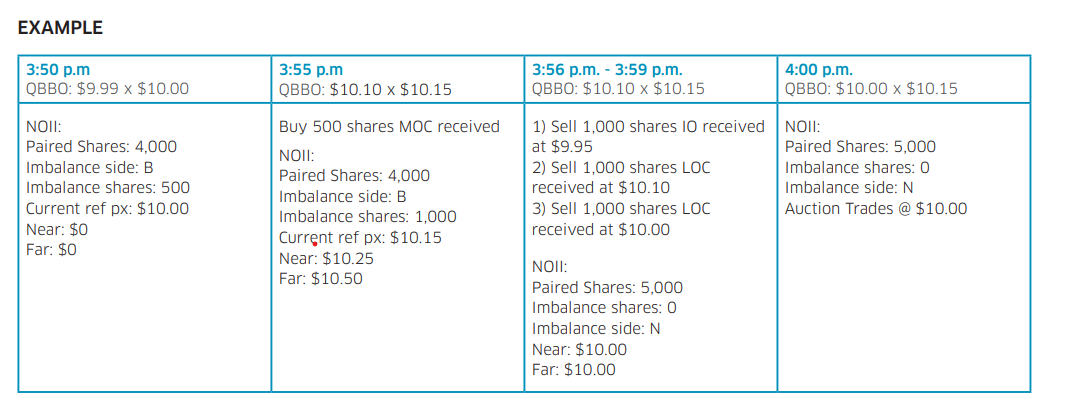



```
# This is formatted as code
```

As you can see on the Nasdaq https://www.nasdaqtrader.com/content/productsservices/Trading/ClosingCrossfaq.pdf There is no publication of the Near and Far price between 3.50pm and 3.55pm.

**Question: How to deal with nan value?**

Plot Nan value evolution during auction time:

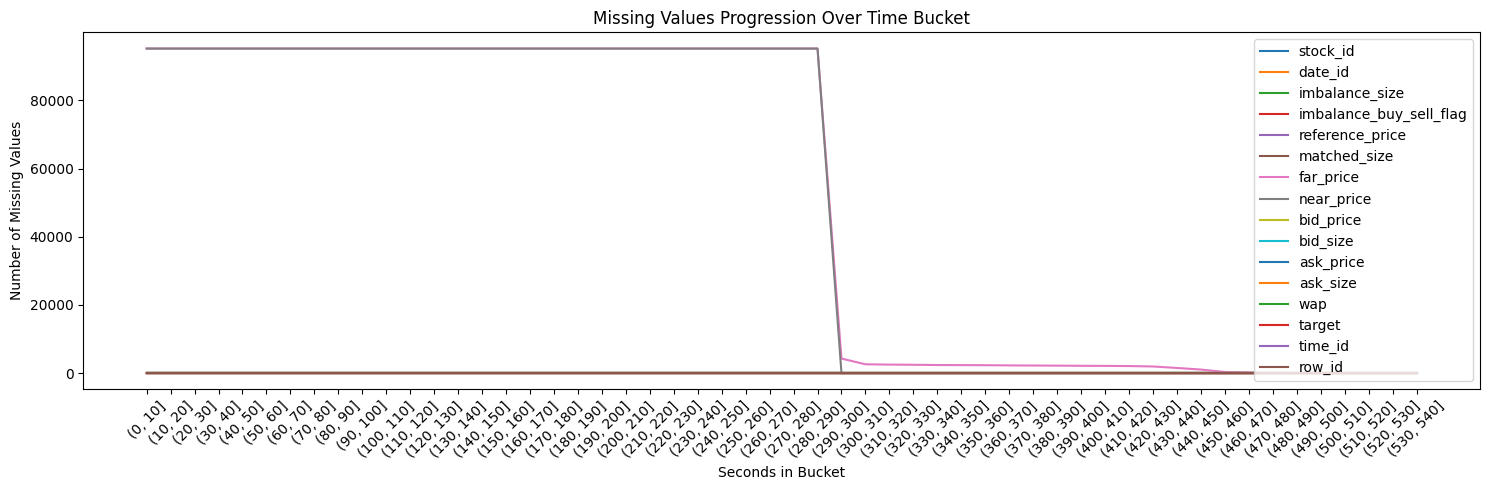

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

def count_nan(group):
    return group.isna().sum()

incr_nan = (
    data.groupby(pd.cut(data['seconds_in_bucket'], range(0, 541, 10)))
    .apply(count_nan)
    .drop('seconds_in_bucket', axis=1)
    .reset_index()
)

for column in incr_nan.columns[1:]:
    sns.lineplot(x=incr_nan['seconds_in_bucket'].astype(str), y=incr_nan[column], label=column)

plt.xticks(rotation=45)
plt.title("Missing Values Progression Over Time Bucket")
plt.ylabel("Number of Missing Values")
plt.xlabel("Seconds in Bucket")
plt.legend()
plt.tight_layout()
plt.show()


Ideas to approach the Nasdaq documentation near_price and far_price equal to zero before 3.55pm

In [ ]:
# dfclean = data.dropna(subset='target')
# dfclean.loc[(dfclean['seconds_in_bucket']<300)&(dfclean['far_price'].isna()), 'far_price'] = 0
# dfclean.loc[(dfclean['seconds_in_bucket']<300)&(dfclean['near_price'].isna()), 'near_price'] = 0

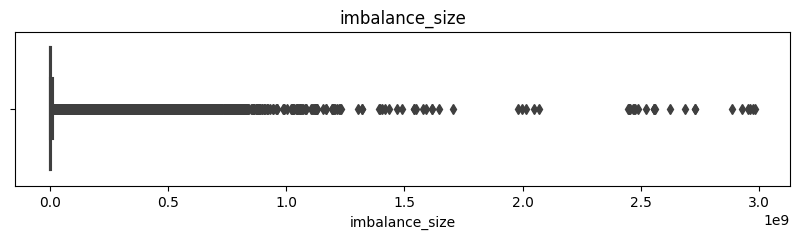

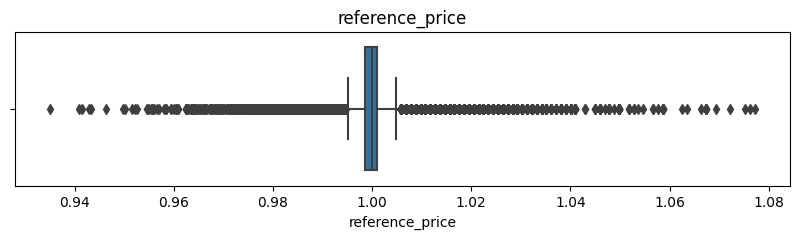

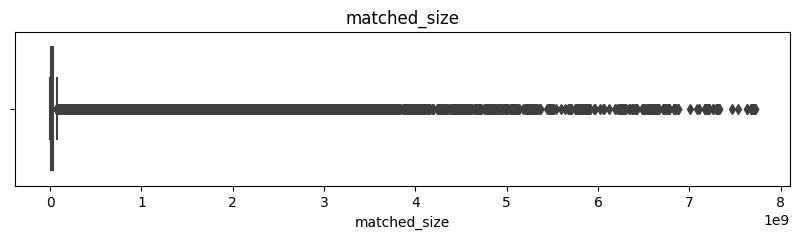

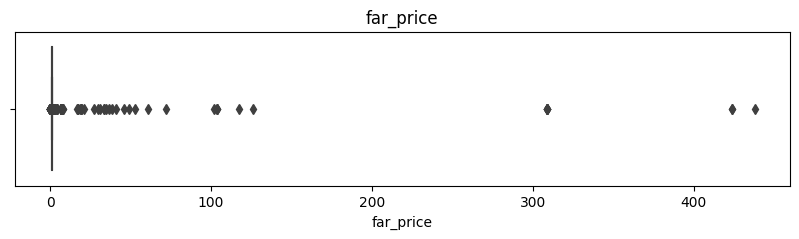

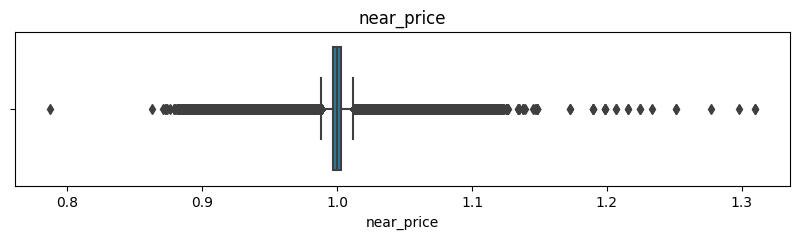

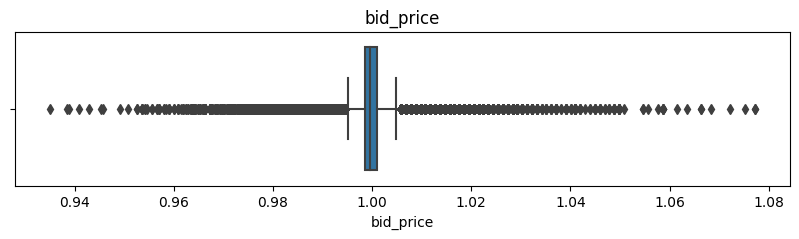

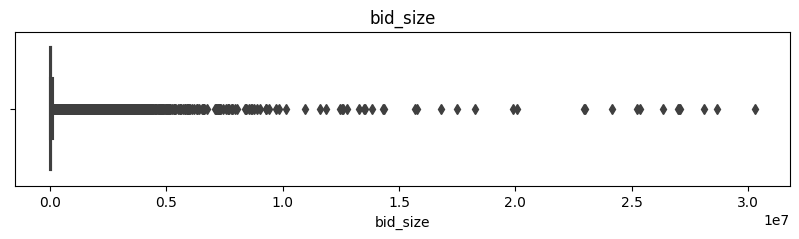

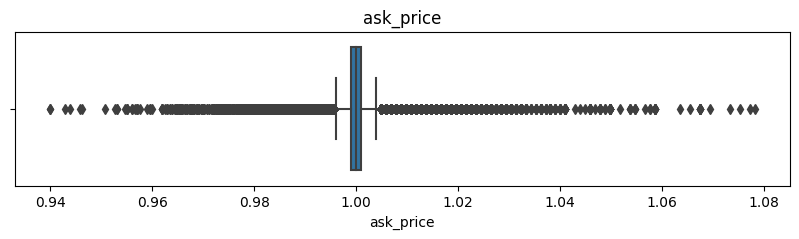

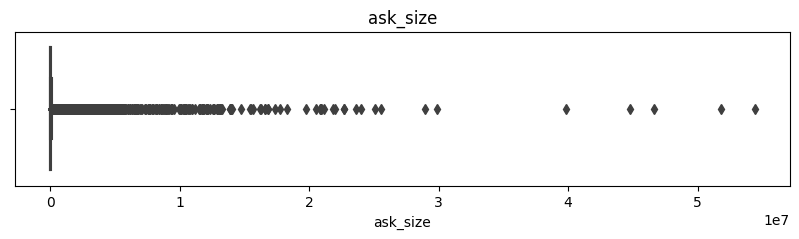

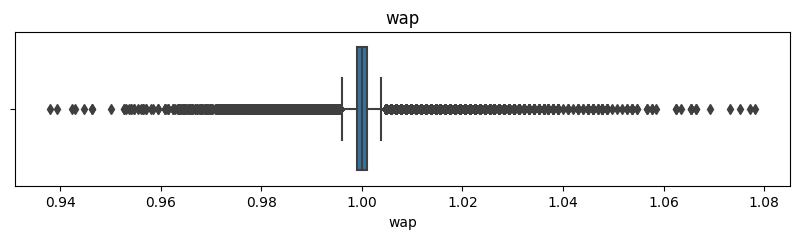

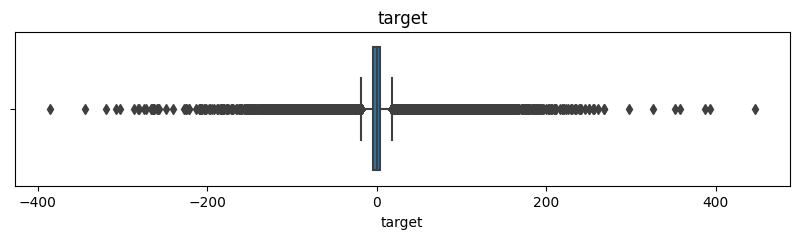

In [ ]:
columns_to_plot = ['imbalance_size', 'reference_price', 'matched_size', 'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap', 'target']

filtered_columns = data.select_dtypes(include=['float16', 'int8', 'int16', 'float32']).columns.intersection(columns_to_plot)

for column in filtered_columns:
    plt.figure(figsize=(10,2))
    sns.boxplot(x=data[column])
    plt.title(column)
    plt.show()
quantile(.25)

# Light-GBM GPU

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Install lightGBM GPU


In [ ]:
!mkdir -p /etc/OpenCL/vendors && echo "libnvidia-opencl.so.1" > /etc/OpenCL/vendors/nvidia.icd

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from itertools import combinations
from sklearn.metrics import mean_absolute_error
from google.colab import drive, files
from numba import njit, prange
import gc

In [ ]:
import lightgbm as lgb
print(lgb.__version__)

4.1.0


In [ ]:
drive.mount('/content/drive')
train_path = "/content/drive/MyDrive/kaggle/Optiver_trading_at_close/train.csv"
df = pd.read_csv(train_path)
df.drop(columns=['row_id'], inplace=True)
# data.dropna(inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.loc[(data['seconds_in_bucket']<300)&(data['far_price'].isna()), 'far_price'] = 0
data.loc[(data['seconds_in_bucket']<300)&(data['near_price'].isna()), 'near_price'] = 0
data.dropna(inplace = True)

In [ ]:
def reduce_memory_usage(df):
    """
    Reduce memory usage by downcasting data types
    within a pandas DataFrame.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print(f'Memory usage of dataframe is {start_mem:.2f} MB')

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print(f'Memory usage after optimization is: {end_mem:.2f} MB')
    print(f'Decreased by {100 * (start_mem - end_mem) / start_mem:.1f}%')

    return df


In [ ]:
# data = reduce_memory_usage(data)

Memory usage of dataframe is 679.35 MB


<ipython-input-8-35580e0d4e3f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.int16)
<ipython-input-8-35580e0d4e3f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.float32)
<ipython-input-8-35580e0d4e3f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

Memory usage after optimization is: 234.78 MB
Decreased by 65.4%


In [ ]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

global_stock_id_feats = {
    "median_size": X_train.groupby("stock_id")["bid_size"].median() + X_train.groupby("stock_id")["ask_size"].median(),
    "std_size": X_train.groupby("stock_id")["bid_size"].std() + X_train.groupby("stock_id")["ask_size"].std(),
    "ptp_size": X_train.groupby("stock_id")["bid_size"].max() - X_train.groupby("stock_id")["bid_size"].min(),
    "median_price": X_train.groupby("stock_id")["bid_price"].median() + X_train.groupby("stock_id")["ask_price"].median(),
    "std_price": X_train.groupby("stock_id")["bid_price"].std() + X_train.groupby("stock_id")["ask_price"].std(),
    "ptp_price": X_train.groupby("stock_id")["bid_price"].max() - X_train.groupby("stock_id")["ask_price"].min(),
}



def imbalance_features(df):
    prices = ["reference_price", "far_price", "near_price", "ask_price", "bid_price", "wap"]
    sizes = ["matched_size", "bid_size", "ask_size", "imbalance_size"]

    df["volume"] = df.eval("ask_size + bid_size")
    df["mid_price"] = df.eval("(ask_price + bid_price) / 2")
    df["liquidity_imbalance"] = df.eval("(bid_size-ask_size)/(bid_size+ask_size)")
    df["matched_imbalance"] = df.eval("(imbalance_size-matched_size)/(matched_size+imbalance_size)")
    df["size_imbalance"] = df.eval("bid_size / ask_size")

    for c in combinations(prices, 2):
        df[f"{c[0]}_{c[1]}_imb"] = df.eval(f"({c[0]} - {c[1]})/({c[0]} + {c[1]})")

    for c in [['ask_price', 'bid_price', 'wap', 'reference_price'], sizes]:
        triplet_feature = calculate_triplet_imbalance_numba(c, df)
        df[triplet_feature.columns] = triplet_feature.values

    df["imbalance_momentum"] = df.groupby(['stock_id'])['imbalance_size'].diff(periods=1) / df['matched_size']
    df["price_spread"] = df["ask_price"] - df["bid_price"]
    df["spread_intensity"] = df.groupby(['stock_id'])['price_spread'].diff()
    df['price_pressure'] = df['imbalance_size'] * (df['ask_price'] - df['bid_price'])
    df['market_urgency'] = df['price_spread'] * df['liquidity_imbalance']
    df['depth_pressure'] = (df['ask_size'] - df['bid_size']) * (df['far_price'] - df['near_price'])
    df['reference_price_change'] = df.groupby('stock_id')['reference_price'].pct_change()
    df['imbalance_effect'] = df.groupby('stock_id')['imbalance_size'].pct_change()
    df['price_elasticity'] = df['reference_price_change'] / df['imbalance_effect']
    for func in ["mean", "std", "skew", "kurt"]:
        df[f"all_prices_{func}"] = df[prices].agg(func, axis=1)
        df[f"all_sizes_{func}"] = df[sizes].agg(func, axis=1)

    return df.replace([np.inf, -np.inf], 0).fillna(0)

def other_features(df):
    df["dow"] = df["date_id"] % 5
    df["dom"] = df["date_id"] % 20
    df["seconds"] = df["seconds_in_bucket"] % 60
    df["minute"] = df["seconds_in_bucket"] // 60

    for key, value in global_stock_id_feats.items():
        df[f"global_{key}"] = df["stock_id"].map(value.to_dict())

    return df

@njit(parallel=True)
def compute_triplet_imbalance(df_values, comb_indices):
    num_rows = df_values.shape[0]
    num_combinations = len(comb_indices)
    imbalance_features = np.empty((num_rows, num_combinations))

    for i in prange(num_combinations):
        a, b, c = comb_indices[i]
        for j in range(num_rows):
            max_val = max(df_values[j, a], df_values[j, b], df_values[j, c])
            min_val = min(df_values[j, a], df_values[j, b], df_values[j, c])
            mid_val = df_values[j, a] + df_values[j, b] + df_values[j, c] - min_val - max_val
            if mid_val == min_val:
                imbalance_features[j, i] = np.nan
            else:
                imbalance_features[j, i] = (max_val - mid_val) / (mid_val - min_val)

    return imbalance_features

def calculate_triplet_imbalance_numba(price, df):
    df_values = df[price].values
    comb_indices = [(price.index(a), price.index(b), price.index(c)) for a, b, c in combinations(price, 3)]
    features_array = compute_triplet_imbalance(df_values, comb_indices)
    columns = [f"{a}_{b}_{c}_imb2" for a, b, c in combinations(price, 3)]
    features = pd.DataFrame(features_array, columns=columns)

    return features

X_train = imbalance_features(X_train.copy())
X_val = imbalance_features(X_val.copy())



/usr/local/lib/python3.10/dist-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'comb_indices' of function 'compute_triplet_imbalance'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-16-1f59707ca391>", line 60:
@njit(parallel=True)
def compute_triplet_imbalance(df_values, comb_indices):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
/usr/local/lib/python3.10/dist-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'comb__indices' of function '__numba_parfor_gufunc_0x78430b440130'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-l

In [ ]:
X_train = reduce_memory_usage(X_train)
X_val = reduce_memory_usage(X_val)

Memory usage of dataframe is 1950.14 MB
Memory usage after optimization is: 651.38 MB
Decreased by 66.6%
Memory usage of dataframe is 487.54 MB
Memory usage after optimization is: 162.85 MB
Decreased by 66.6%


In [ ]:
X_train['rolling_mean'] = X_train['wap'].rolling(window=10).mean()
X_train['rolling_std'] = X_train['wap'].rolling(window=10).std()
X_val['rolling_mean'] = X_val['wap'].rolling(window=10).mean()
X_val['rolling_std'] = X_val['wap'].rolling(window=10).std()

In [ ]:
params = {
    'objective': 'regression',
    'metric': 'mae',
    'verbosity': 1,
    'boosting_type': 'gbdt',
    'device': 'gpu'
}

gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8, 16, 24],
    'num_leaves': [20, 24, 28],
    'boosting_type': ['gbdt'],
    'objective': ['regression'],
    'random_state': [501],
    'colsample_bytree': [0.64, 0.65],
    'subsample': [0.7, 0.75],
    'reg_alpha': [1, 2],
    'reg_lambda': [1, 2]
}


In [ ]:
# mdl = lgb.LGBMRegressor()
# grid = GridSearchCV(mdl, gridParams, verbose=2, cv=4, n_jobs=-1)
# grid.fit(X_train, y_train)


# params.update(grid.best_params_)

Fitting 4 folds for each of 384 candidates, totalling 1536 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
mdl = lgb.LGBMRegressor()
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=3, n_jobs=-1, pre_dispatch='2*n_jobs')
grid.fit(X_train, y_train)
params = grid.best_params_
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

gbm = lgb.train(params, lgb_train, num_boost_round=20, valid_sets=lgb_eval)# early_stopping_rounds=5)

y_pred_val = gbm.predict(X_val, num_iteration=gbm.best_iteration)

mae = mean_absolute_error(y_val, y_pred_val)
print(f"Mean Absolute Error (MAE) using LightGBM on validation set: {mae:.4f}")

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


PicklingError: ignored

Mean Absolute Error (MAE) using LightGBM on validation set: 5.6918

In [ ]:
gbm = lgb.train(params, lgb_train, num_boost_round=20, valid_sets=lgb_eval)# early_stopping_rounds=5)
gbm.save_model("First_gridsearch.txt")
# y_pred_val = gbm.predict(X_val, num_iteration=gbm.best_iteration)

# mae = mean_absolute_error(y_val, y_pred_val)
# print(f"Mean Absolute Error (MAE) using LightGBM on validation set: {mae:.4f}")

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.470677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15273
[LightGBM] [Info] Number of data points in the train set: 1874910, number of used features: 62
[LightGBM] [Info] Start training from score -0.041933


In [ ]:
# Read the content of the saved model file
with open("First_gridsearch.txt", "r") as f:
    model_str = f.read()

# Load the model from the string content
loaded_gbm = lgb.Booster(model_str=model_str)

# Alternatively, you can directly use the below method to load the model
# loaded_gbm = lgb.Booster(model_file='First_gridsearch.txt')


In [ ]:
y_pred_val = loaded_gbm.predict(X_val, num_iteration=gbm.best_iteration)

mae = mean_absolute_error(y_val, y_pred_val)
print(f"Mean Absolute Error (MAE) using LightGBM on validation set: {mae:.4f}")

Mean Absolute Error (MAE) using LightGBM on validation set: 5.6918


In [ ]:
# train_data = lgb.Dataset(X_train, label=y_train)
# val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)
# num_round = 1000
# bst = lgb.train(params, train_data, num_round, valid_sets=[val_data])

# y_pred_val = bst.predict(X_val, num_iteration=bst.best_iteration)

# mae = mean_absolute_error(y_val, y_pred_val)
# print(f"Mean Absolute Error (MAE) using LightGBM on validation set: {mae:.4f}")

In [ ]:
# params = {
#     'objective': 'regression',
#     'metric': 'mae',
#     'verbosity': 1,
#     'boosting_type': 'gbdt',
#     'device': 'cpu',
#     'gpu_platform_id': 0,
#     'gpu_device_id': 0
# }

# train_data = lgb.Dataset(X_train, label=y_train)
# val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# num_round = 1000
# bst = lgb.train(params, train_data, num_round, valid_sets=[val_data])

# # Predict on validation set
# y_pred_val = bst.predict(X_val, num_iteration=bst.best_iteration)

# # Calculate MAE
# mae = mean_absolute_error(y_val, y_pred_val)
# print(f"Mean Absolute Error (MAE) using LightGBM on validation set: {mae:.4f}")


[link text](https://)## Test install LightGBM on gpu